In [1]:
import numpy
from scipy.special import j0
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import scipy.integrate as integrate

101 0.3433 0.2733


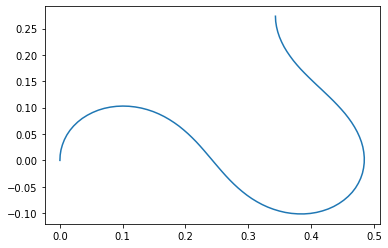

In [2]:
from scipy.integrate import quad


def simps(f, a, b, N=50):
    #     Simpson's rule approximates the integral \int_a^b f(x) dx by the sum:
    #     (dx/3) \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i}))
    #     where x_i = a + i*dx and dx = (b - a)/N.
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b - a) / N
    x = numpy.linspace(a, b, N + 1)
    y = f(x)
    S = dx / 3 * numpy.sum(y[0:-1:2] + 4 * y[1::2] + y[2::2])
    return S


# The bessel function formulation
PI = numpy.pi
Sin = numpy.sin
Cos = numpy.cos
Sqrt = numpy.sqrt
Power = numpy.power
Argmin = numpy.argmin
Round = numpy.round
Arange = numpy.arange

S = 1
L = 1
numPoints = 100

# the input coordinates
xee, yee = 0.3433, 0.2733
# xee, yee = -0.2933, 0.6133
# xee, yee = 0.35, 0.24
# xee, yee = -0.3, 0.6
# xee, yee = 0.4, 0.5


# a₂ = Arctan2(xₑₑ, yₑₑ) equation 16
a2 = numpy.arctan2(xee, yee)

# Calculating the inverse bessel function
# xₑₑ = sin(a₂(t)) J₀[√(a₁²(t) +a₂²(t))]
# or J₀[√(a₁²(t) + a₂²(t))] = xₑₑ / sin(a₂(t))
# or J₀⁻¹ (xₑₑ / sin(a₂)) = J₀⁻¹ (J₀[√(a₁²(t) + a₂²(t))])

# It can be shown that J₀⁻¹J₀(x) = 1, for 0<x<μ where μ
# is the first local minima.
# ⟹ a₁ = √(J₀⁻¹(xₑₑ / sin(a₂))² - a₂²(t)) ... eq(1)
# let μₙ = [0 ... μ] be an equidistant list in range (0, μ)
# let x = xₑₑ / sin(a₂), xₐₘᵢₙ = argmin(abs(x - J₀(μₙ)))
# Then J₀⁻¹(xₑₑ / sin(a₂) can re-written as the value of
# μₙ at xₐₘᵢₙ
μₙ = Arange(0, 3.832, 0.001)
xₐₘᵢₙ = Argmin(abs(xee / Sin(a2) - j0(μₙ)))
# then a₁ = √(μₙ[xₐₘᵢₙ])² - a₂²(t))
a1 = Sqrt(Power(μₙ[xₐₘᵢₙ], 2) - Power(a2, 2))

# ϕ(s) = a₁ sin(2πs) + a₂(1 - cos(2πs)) (equation 14)
phiS = lambda s: a1 * Sin(2 * PI * s) + a2 * (1 - Cos(2 * PI * s))

#  equation 8
X1sj = lambda b: simps(lambda s: L * Sin(phiS(s)), 0, b)
X2sj = lambda b: simps(lambda s: L * Cos(phiS(s)), 0, b)

step = S / numPoints
sj = numpy.arange(0, S + step, step)

# Coordinates
x1 = [Round(X1sj(s), 4) for s in sj]
x2 = [Round(X2sj(s), 4) for s in sj]

print(len(x1), x1[-1], x2[-1])
plt.plot(x1, x2)

In [ ]:
a = numpy.asarray([ 0.0, 0.048282154, 0.14964627, 0.2271721, 0.2923214, 0.38680357, 0.47262728, 0.47387636, 0.41286126, 0.3529092 ])
b = numpy.asarray([ 0.0, 0.08865001, 0.091988824, 0.02201369, -0.06087117, -0.10153929, -0.04891829, 0.053211924, 0.13874893, 0.22494857 ])
a += 200
b += 200
print(a[-1], b[-1])
plt.plot(a, b)
# plt.plot(x1, x2)